# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

sorted_columns_data = combined_data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", 
                                     "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]

# Display the sorted data table for preview
sorted_columns_data.head()

# Display the data table for preview
# combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [78]:
# Checking the number of mice.
number_of_mice = sorted_columns_data["Mouse ID"].nunique()
print(f"Number of unique mice: {number_of_mice}")

Number of unique mice: 249


In [79]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = sorted_columns_data[sorted_columns_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Display duplicate mice
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [80]:
# Optional: Get all the data for the duplicate mouse ID
duplicate_mouse_id = duplicate_mice["Mouse ID"].unique()
duplicate_mouse_data = sorted_columns_data[sorted_columns_data["Mouse ID"].isin(duplicate_mouse_id)]

# Display the data for the duplicate mouse ID
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [81]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_data = combined_data[~combined_data["Mouse ID"].isin(duplicate_mouse_id)]

# Display the cleaned data table for preview
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [82]:
# Checking the number of mice in the clean DataFrame.
number_of_clean_mice = clean_data["Mouse ID"].nunique()
print(f"Number of unique mice in the clean DataFrame: {number_of_clean_mice}")

Number of unique mice in the clean DataFrame: 248


## Summary Statistics

In [83]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean_Tumor_Volume="mean",
    Median_Tumor_Volume="median",
    Tumor_Volume_Variance="var",
    Tumor_Volume_Std_Dev="std",
    Tumor_Volume_Std_Err="sem"
)

# Rename the columns for display
summary_stats.columns = [
    "Mean Tumor Volume", 
    "Median Tumor Volume", 
    "Tumor Volume Variance", 
    "Tumor Volume Std. Dev.", 
    "Tumor Volume Std. Err."
]

# Display the summary statistics DataFrame
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [84]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
advanced_summary_stats = clean_data.groupby("Drug Regimen").agg(
    mean=("Tumor Volume (mm3)", "mean"),
    median=("Tumor Volume (mm3)", "median"),
    var=("Tumor Volume (mm3)", "var"),
    std=("Tumor Volume (mm3)", "std"),
    sem=("Tumor Volume (mm3)", "sem")
)

# Display the advanced summary statistics DataFrame
advanced_summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

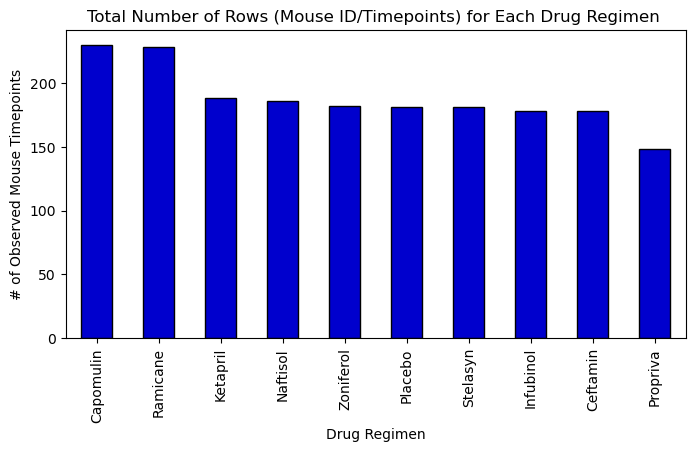

In [85]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_count_per_regimen = clean_data["Drug Regimen"].value_counts()

# Plotting the bar plot
mouse_count_per_regimen.plot(kind='bar', figsize=(8, 4), color='mediumblue', edgecolor='black')
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen ')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

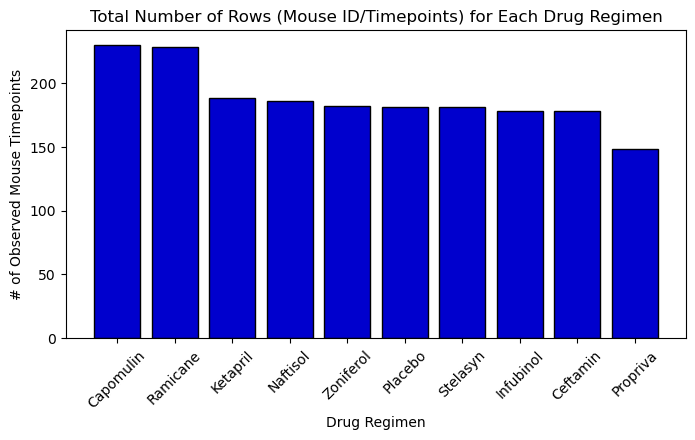

In [86]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_count_per_regimen = clean_data["Drug Regimen"].value_counts()

# Plotting the bar plot using pyplot
plt.figure(figsize=(8, 4))
plt.bar(mouse_count_per_regimen.index, mouse_count_per_regimen.values, color='mediumblue', edgecolor='black')
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()

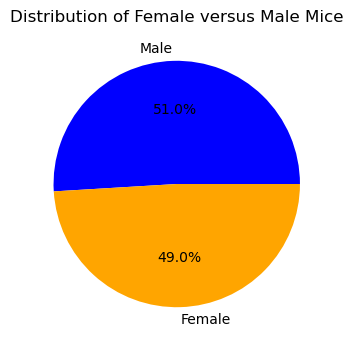

In [87]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = clean_data["Sex"].value_counts()

# Plotting the pie plot
gender_distribution.plot(kind='pie', figsize=(4, 4), colors=['blue' , 'orange'], autopct='%1.1f%%', startangle=0)
plt.title('Distribution of Female versus Male Mice')
plt.ylabel('')  # Hides the y-label
plt.show()

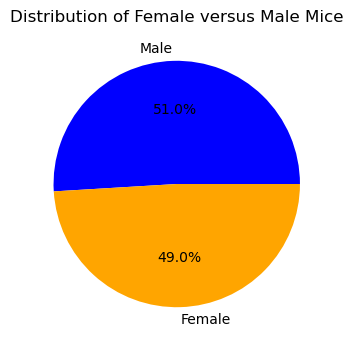

In [88]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution = clean_data["Sex"].value_counts()

# Plotting the pie plot using pyplot
plt.figure(figsize=(4, 4))
plt.pie(gender_distribution, labels=gender_distribution.index, colors=['blue', 'orange'], autopct='%1.1f%%', startangle=0)
plt.title('Distribution of Female versus Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [89]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, clean_data, on=["Mouse ID", "Timepoint"], how="left")

# Filter the DataFrame to include only the four treatment regimens
final_tumor_volume_filtered = final_tumor_volume[final_tumor_volume["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Display the final tumor volume data for preview
final_tumor_volume_filtered.head(8)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
10,a520,45,Ramicane,Male,13,21,38.810366,1
11,a577,30,Infubinol,Female,6,25,57.031862,2
12,a644,45,Ramicane,Female,7,17,32.978522,1


In [90]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volume_filtered[final_tumor_volume_filtered["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
    # add subset
    tumor_vol_data.append(treatment_data)
    
    # Determine outliers using upper and lower bounds
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"{treatment} potential outliers: {outliers}")


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


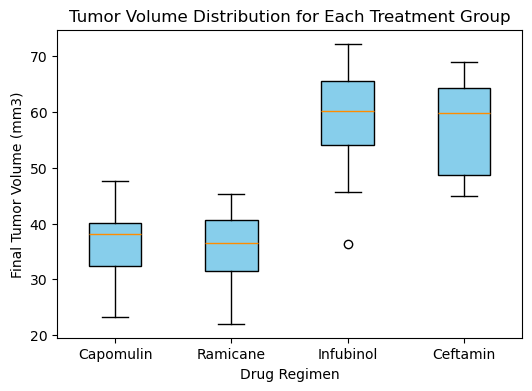

In [91]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group
plt.figure(figsize=(6, 4))
plt.boxplot(tumor_vol_data, labels=treatments, patch_artist=True, 
            boxprops=dict(facecolor='skyblue', color='black'),
            medianprops=dict(color='darkorange'))

plt.title('Tumor Volume Distribution for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

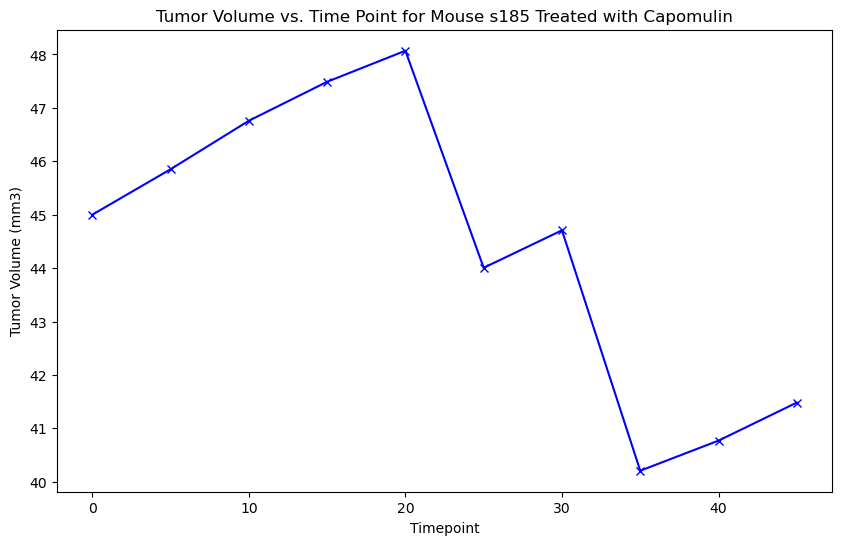

In [92]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse_data = clean_data[(clean_data["Drug Regimen"] == "Capomulin") & (clean_data["Mouse ID"] == "l509")]

plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data["Timepoint"], single_mouse_data["Tumor Volume (mm3)"], marker='x', color='blue')

plt.title('Tumor Volume vs. Time Point for Mouse s185 Treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

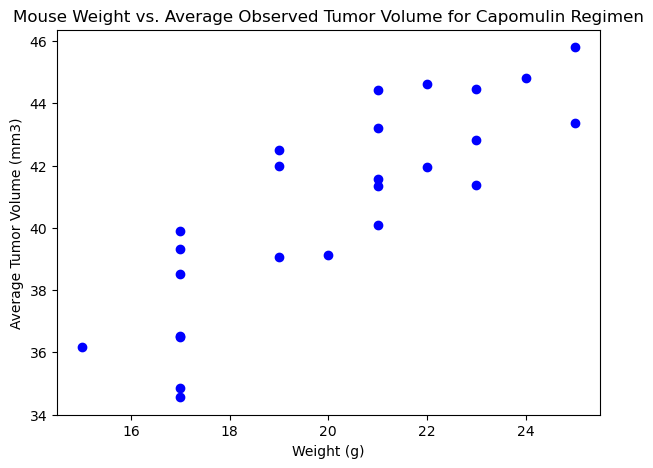

In [93]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
avg_tumor_volume = capomulin_data.groupby("Mouse ID").agg(
    avg_tumor_vol=("Tumor Volume (mm3)", "mean"),
    weight=("Weight (g)", "mean")
).reset_index()

plt.figure(figsize=(7, 5))
plt.scatter(avg_tumor_volume["weight"], avg_tumor_volume["avg_tumor_vol"], color='blue')

plt.title('Mouse Weight vs. Average Observed Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


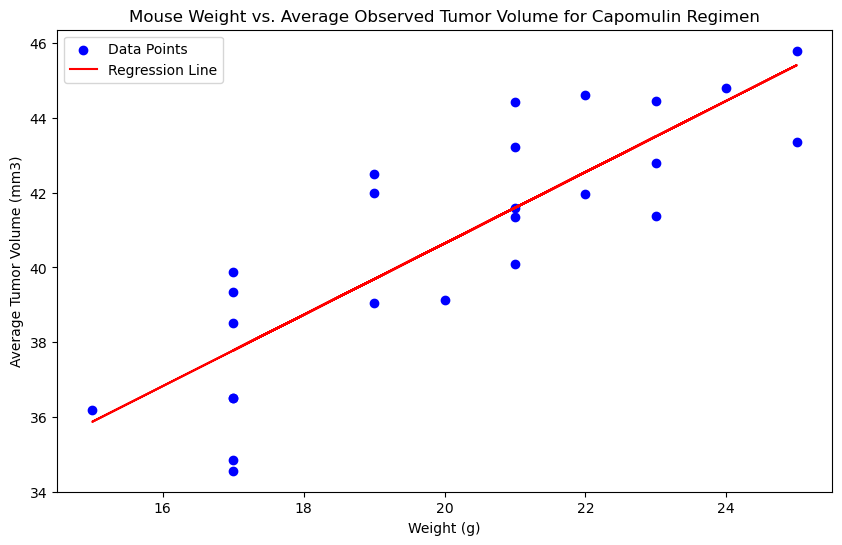

Slope: 0.95
Intercept: 21.55
R-squared: 0.71
P-value: 0.00
Standard error: 0.13


In [98]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation = avg_tumor_volume["weight"].corr(avg_tumor_volume["avg_tumor_vol"])
print(f"The correlation between mouse weight and the average tumor volume is: {correlation:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(avg_tumor_volume["weight"], avg_tumor_volume["avg_tumor_vol"])

# Generate regression line values
regress_values = intercept + slope * avg_tumor_volume["weight"]

# Plot the scatter plot and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_volume["weight"], avg_tumor_volume["avg_tumor_vol"], color='blue', label='Data Points')
plt.plot(avg_tumor_volume["weight"], regress_values, color='red', label='Regression Line')

plt.title('Mouse Weight vs. Average Observed Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.show()

# Display the linear regression results
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.2f}")
print(f"Standard error: {std_err:.2f}")